In [282]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [283]:
def WACC(E, D, Re, Rd, Tc=.21):
    """
    Parameters:
    E = MV of equity
    D = MV of debt
    Re = cost of equity
    Rd = cost of debt
    TC = coporate tax rate
    Returns:
    Weight Average Cost of Capital
    """
    V = E + D
    return (E/V * Re) + (D/V * Rd * (1-Tc))

In [284]:
dr = np.round(WACC(30189000000, 8873000000, 0.1012, 0.045), 4)
dr

0.0863

In [285]:
stock = yf.Ticker("TSLA")
cashflows = stock.cashflow
bal_sheet = stock.balance_sheet
financials = stock.financials

In [286]:
working_cap = cashflows.loc[["Change To Liabilities", "Change To Inventory", "Change To Account Receivables"]]

In [287]:
non_cash = cashflows.loc[["Capital Expenditures", "Depreciation"]]

In [288]:
ni = financials.loc[["Net Income"]]
dcf = pd.concat([ni, non_cash, working_cap])
dcf
fcf = {}
for i in list(dcf):
    y = dcf[i]
    fcf[i] = y["Net Income"] + y["Capital Expenditures"] + y["Depreciation"] + y["Change To Liabilities"] + y["Change To Inventory"] + y["Change To Account Receivables"]
fcf = pd.DataFrame(fcf, index=["Free Cash Flow"])
dcf = pd.concat([dcf, fcf])
fcfs = dcf.loc["Free Cash Flow"]
fcf_growth = np.array([])
for i in range(len(fcfs) - 1):
    fcf_growth = np.append(fcf_growth, fcfs[i]/fcfs[i+1])
fcf_gr = np.mean(fcf_growth)
future_fcfs = np.array([])
for i in range(5):
    future_fcfs = np.append(future_fcfs, 5347000000 * fcf_gr**i / (1+dr)**i)

In [289]:
shares = 3099000000
g = 0.045
debt = 8873000000
TV = np.sum(future_fcfs) + (future_fcfs[-1] * (1+g))/((1+dr)-g)
fair_value = TV/shares

In [290]:
last_price = tsla.history().iloc[-1].loc["Close"]
if last_price > fair_value:
    print("TSLA is overvalued by {}%".format(100 - np.round(fair_value/last_price * 100, 2)))
else:
    print("TSLA is undervalued by {}%".format(100 - np.round(fair_value/last_price * 100, 2)))
    

TSLA is overvalued by 60.43%


In [291]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()
stock_data = pdr.get_data_yahoo("TSLA")
close = stock_data.Close

In [292]:
log_return = np.log(stock_data.Close/stock_data.Close.shift(1).dropna())

In [293]:
daily_std = log_return.std()

In [294]:
annualized_volatility = daily_std * np.sqrt(252)
annualized_volatility = annualized_volatility * 100

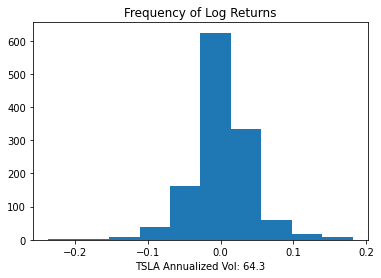

In [295]:
fig = plt.hist(log_return)
plt.title("Frequency of Log Returns")
plt.xlabel("TSLA Annualized Vol: " + str(np.round(annualized_volatility, 1)))
plt.show()

<AxesSubplot:xlabel='Date'>

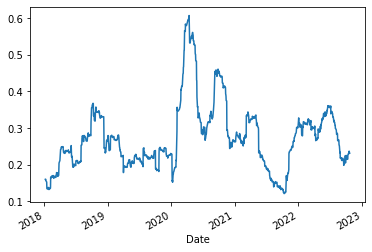

In [296]:
TRADING_DAYS = 50
volatility = log_return.rolling(window = TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility.plot()

<AxesSubplot:xlabel='Date'>

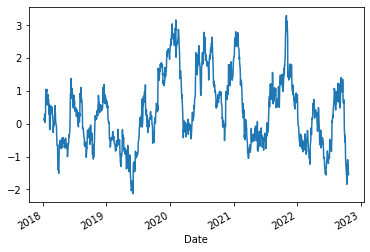

In [297]:
RISK_FREE_RATE = 0.04/252
rolling_sharpe = (log_return.rolling(window=TRADING_DAYS).mean() - RISK_FREE_RATE)*TRADING_DAYS/volatility
rolling_sharpe.plot()